In [1]:
%config InlineBackend.figure_format='retina'
%matplotlib inline
import matplotlib as mpl
import probfit
import numpy as np
import iminuit
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data_x = np.random.normal(2,1,7000)
data_x = np.append(data_x, np.random.uniform(-10, 10, 4000))
data_y = np.random.normal(-2,1,7000)
data_y = np.append(data_y, np.random.uniform(-10, 10, 4000))
df = pd.DataFrame({'x': data_x, 'y': data_y})

In [3]:
fit_range = (-10,10)
G1 = probfit.Normalized(probfit.rename(probfit.ugaussian, ['x', 'mu1', 'sigma1']), fit_range)
G2 = probfit.Normalized(probfit.rename(probfit.ugaussian, ['x', 'mu2', 'sigma2']), fit_range)
pdf_sig = probfit.ProdPdf(G1, G2)
pdf_sig_e = probfit.Extended(pdf_sig, extname='NSig')
P1 = probfit.Normalized(probfit.Polynomial(0), fit_range)
P2 = probfit.Normalized(probfit.rename(probfit.Polynomial(0), ['x', 'd_0']), fit_range)
pdf_bkg = probfit.ProdPdf(P1, P2)
pdf_bkg_e = probfit.Extended(pdf_bkg, extname='NBkg')
pdf = probfit.AddPdf(pdf_sig_e, pdf_bkg_e)

In [4]:
# pdf = pdf, extname='NSig')
binned_likelihood = probfit.UnbinnedLH(pdf, df.values, extended=True, extended_bound=(fit_range, fit_range))
values = dict(mu1=3, error_mu1=0.1,
              sigma1=2, error_sigma1=0.01, limit_sigma1=(0.00001, 5),
              mu2=3, error_mu2=0.1,
              sigma2=2, error_sigma2=0.01, limit_sigma2=(0.00001, 5),
              c_0 = 1, error_c_0 = 0.1, fix_c_0=True,
              #c_1 = 0.001, error_c_1 = 0.0001,
              d_0 = 1, error_d_0 = 0.1, fix_d_0=True,
              #d_1 = 0.001, error_d_1 = 0.0001,
              # f_0 = 0.5, error_f_0=0.01, limit_f_0=(0.00001, 0.999999),
              NSig = 1000., error_NSig=50,
              NBkg = 1000., error_NBkg=50
             )
              # NSig=5000, error_NSig=500)
minuit = iminuit.Minuit(binned_likelihood, **values);

In [5]:
minuit.migrad()
minuit.print_matrix();

FCN = -41548.6723035 
 TOTAL NCALL = 292 
 NCALLS = 292 
 
 
 EDM = 2.14693603129e-05 
 GOAL EDM = 5e-06 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,mu1,1.99791,0.0124573,0,0,,,
2,sigma1,0.979211,0.00961861,0,0,1e-05,5.0,
3,mu2,-2.00327,0.0125978,0,0,,,
4,sigma2,0.989548,0.00976375,0,0,1e-05,5.0,
5,NSig,6964.55,85.7693,0,0,,,
6,c_0,1,0.1,0,0,,,FIXED
7,d_0,1,0.1,0,0,,,FIXED
8,NBkg,4035.53,66.5345,0,0,,,


+,mu1,sigma1,mu2,sigma2,NSig,NBkg
mu1,1.00,-0.00,-0.00,0.00,-0.00,0.00
sigma1,-0.00,1.00,0.00,0.03,0.07,-0.08
mu2,-0.00,0.00,1.00,0.01,0.00,-0.00
sigma2,0.00,0.03,0.01,1.00,0.07,-0.09
NSig,-0.00,0.07,0.00,0.07,1.00,-0.07
NBkg,0.00,-0.08,-0.00,-0.09,-0.07,1.00


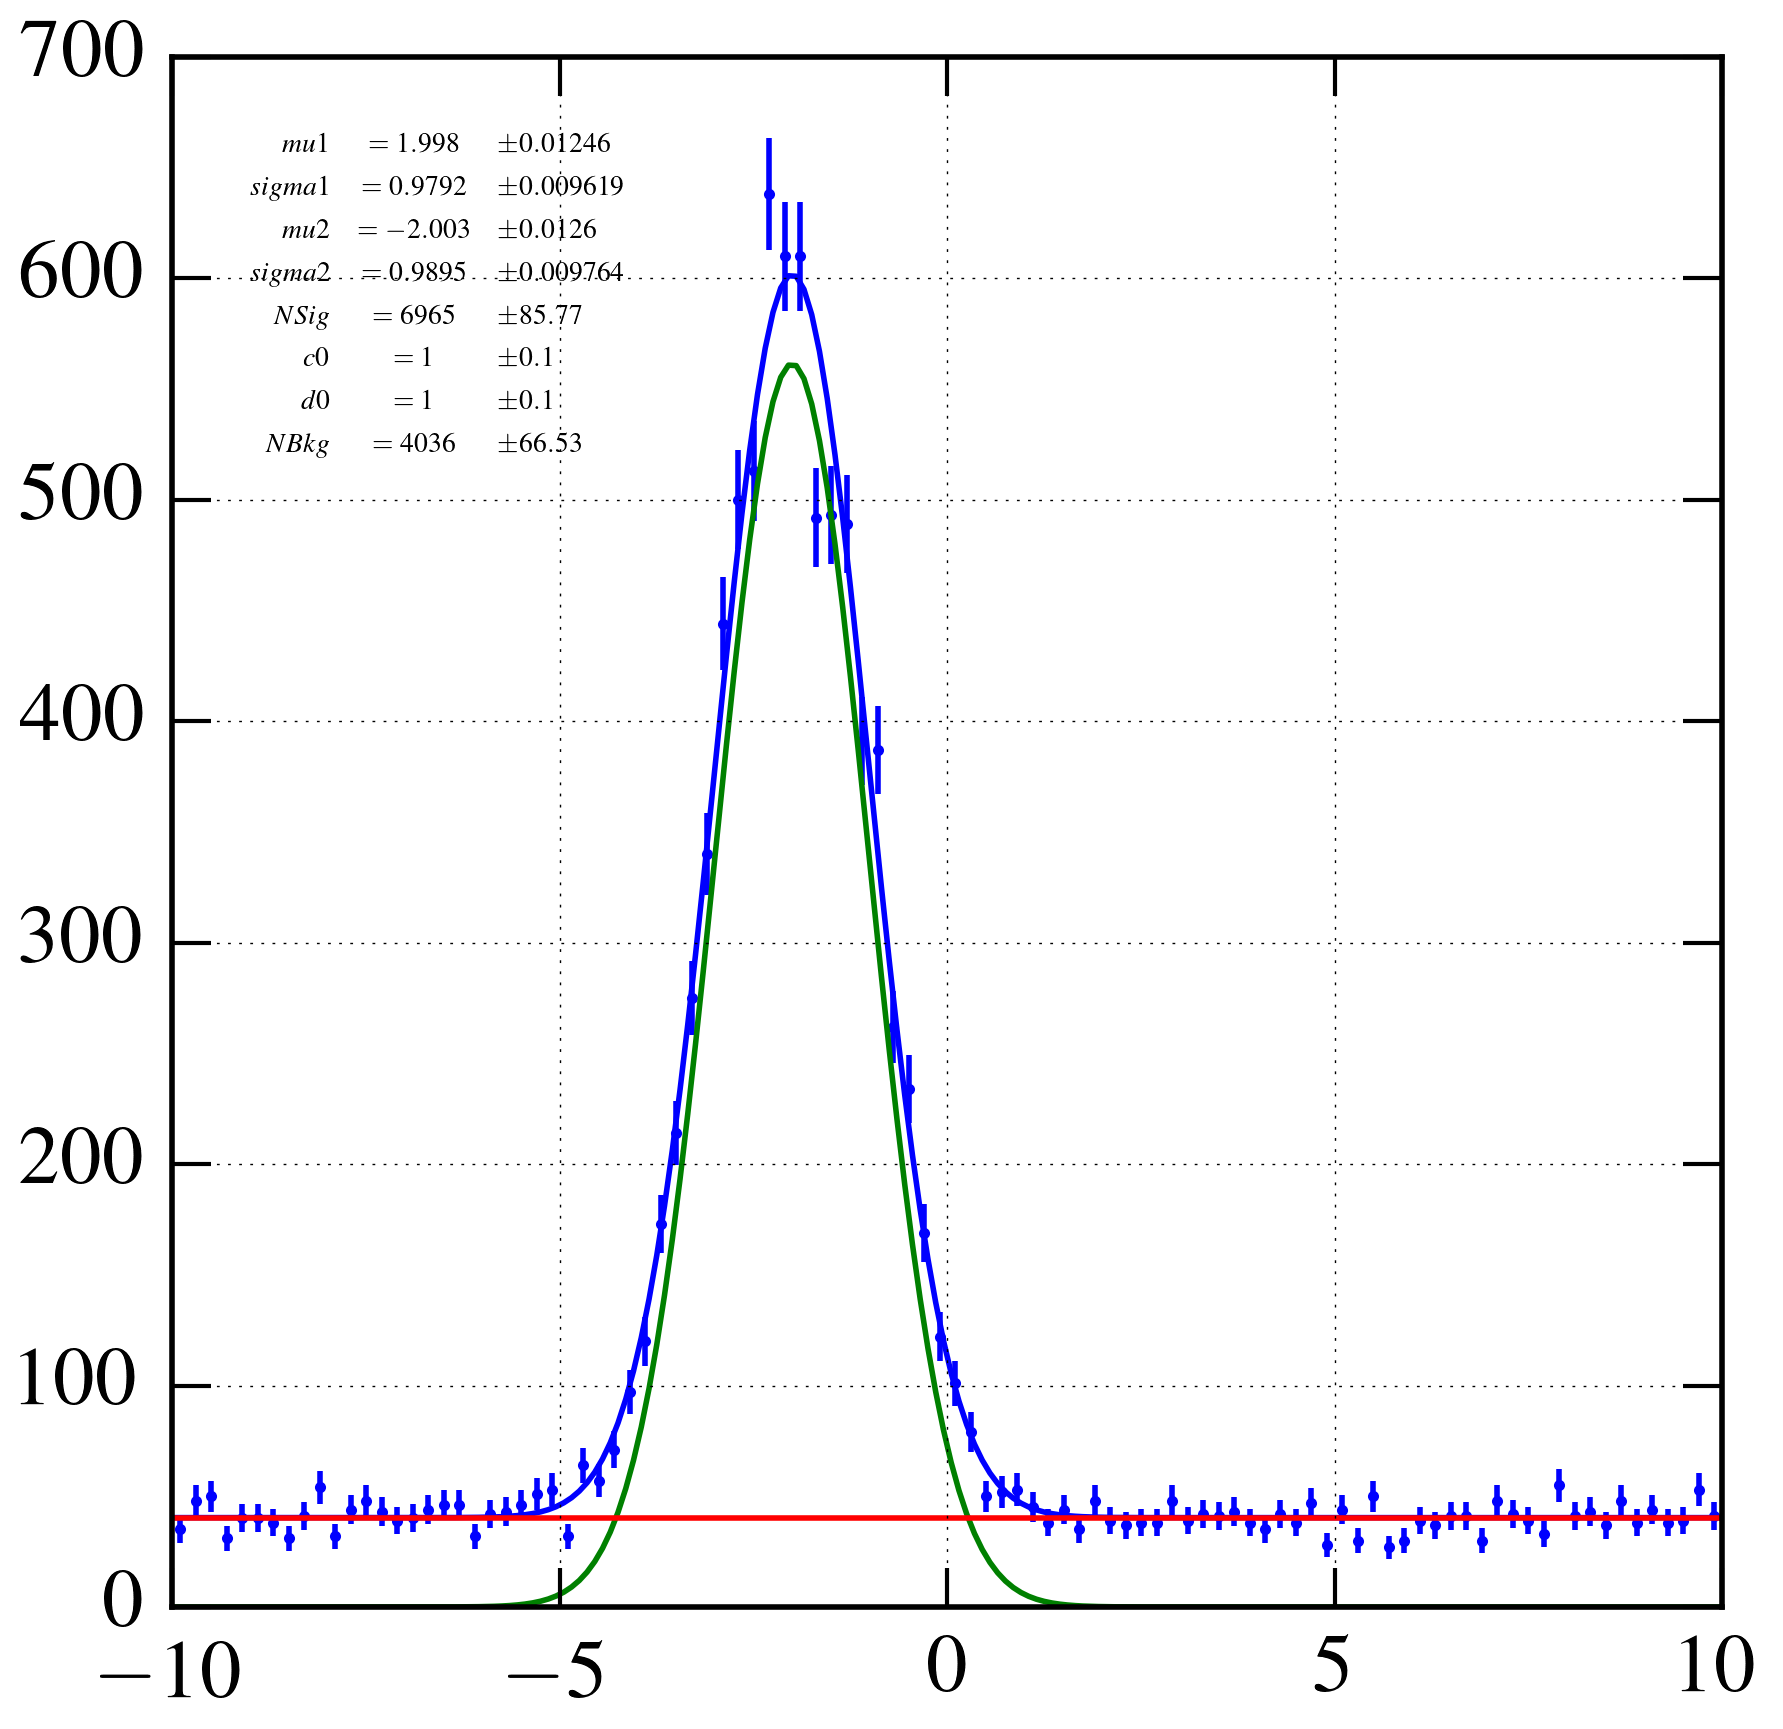

In [6]:
f, ax = plt.subplots(figsize=(10, 10))
binned_likelihood.draw(minuit, dim=1, parts=True, ax=ax, project_pdf=[pdf_sig, pdf_bkg], bins=100);

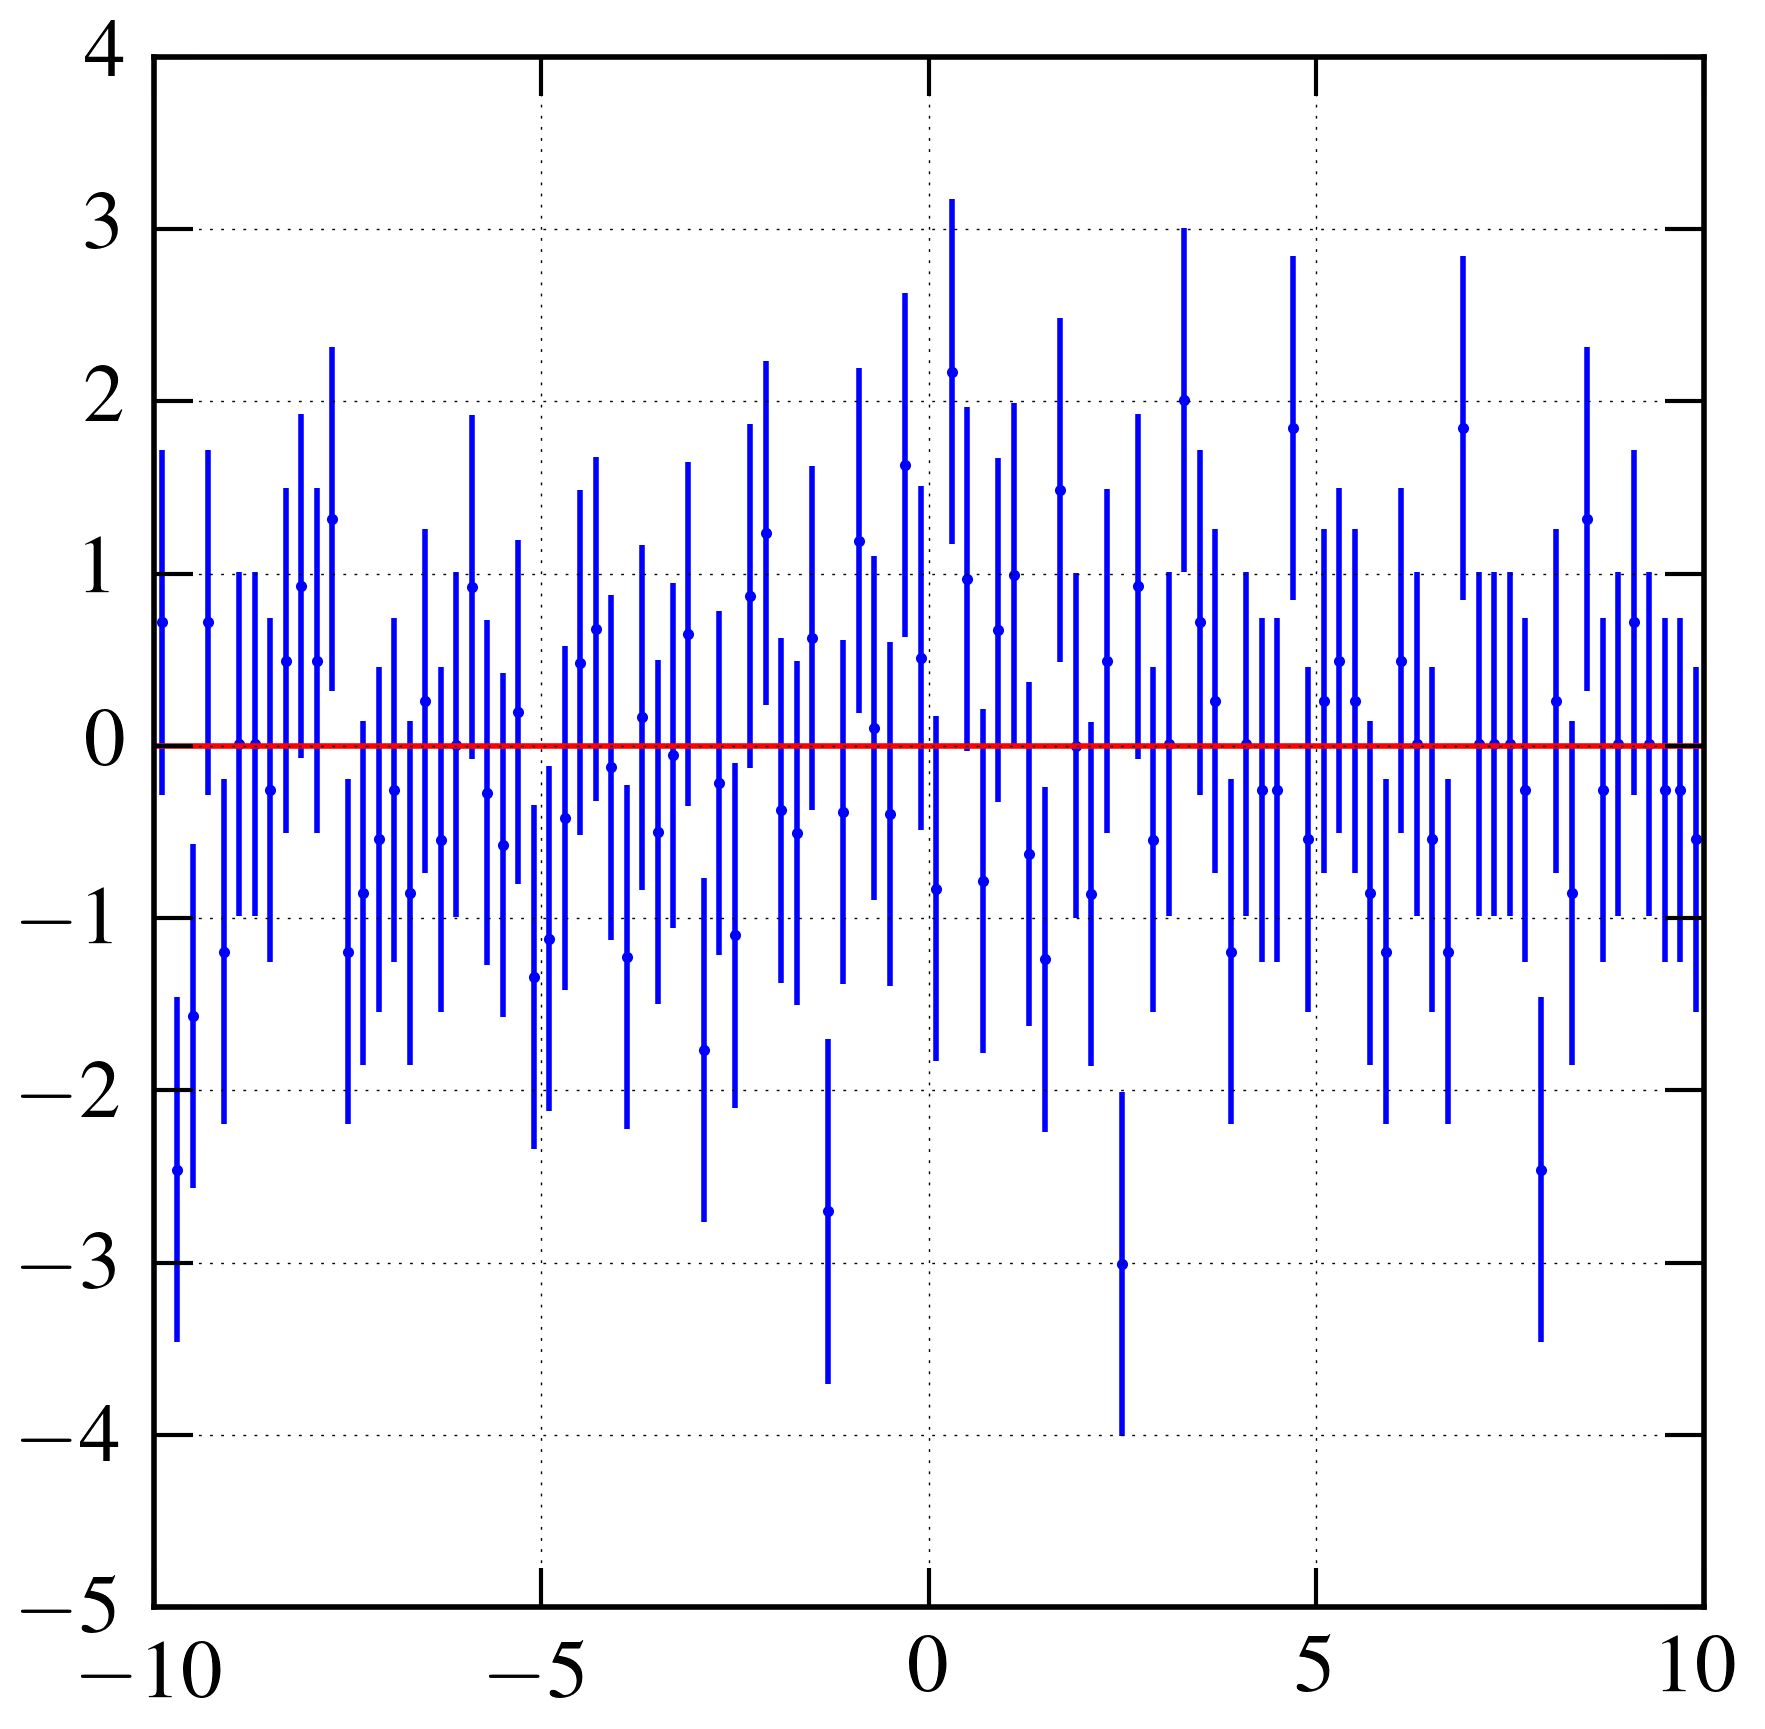

In [16]:
f, ax = plt.subplots(figsize=(10, 10))
binned_likelihood.draw_residual(minuit, dim=1, ax=ax, project_pdf=[pdf_sig, pdf_bkg], norm=True);

In [16]:
tab = minuit.latex_initial_param()

In [21]:
df.head()

,x,y
0,1.136775,-0.785694
1,4.109519,-1.544824
2,4.069004,-0.826014
3,0.303707,-3.024313
4,2.581192,-2.556836


In [39]:
vals, edges = np.histogramdd(df.values,range=(fit_range, fit_range), bins=(10,5))

In [40]:
vals, edges

(array([[   68.,    67.,    81.,    69.,    81.],
        [   79.,    80.,    73.,    95.,    68.],
        [   76.,    84.,    85.,    79.,    86.],
        [   80.,    91.,    80.,    73.,    73.],
        [   72.,   141.,   157.,    86.,    84.],
        [   78.,  1808.,  1719.,    72.,    86.],
        [   89.,  1795.,  1698.,    70.,    84.],
        [   92.,   187.,   154.,    89.,    66.],
        [   70.,    91.,    84.,    89.,    77.],
        [   83.,    87.,    78.,    72.,    74.]]),
 [array([-10.,  -8.,  -6.,  -4.,  -2.,   0.,   2.,   4.,   6.,   8.,  10.]),
  array([-10.,  -6.,  -2.,   2.,   6.,  10.])])

In [43]:
X, Y = np.meshgrid(*edges)

In [1]:
X

NameError: name 'X' is not defined